In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import scipy as sp

In [2]:
def periodic_boundary(index, num_grid_points):
        if index < num_grid_points/2:
            return 2*index
        else:
            return 2*(num_grid_points-index)-1

In [4]:
def index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points):
        index_i * num_j_grid_points + index_j

In [5]:
def index_periodic_boundary_backward_converter(Periodic_L_index, Periodic_L_indices,num_j_grid_points):
        index_i, index_j = Periodic_L_indices[Periodic_L_index]
        L_index = index_i * num_j_grid_points + index_j
        return L_index

In [6]:
num_i_grid_points = 
num_j_grid_points = 50
Final_Time = 10.0
Num_Timesteps = 50
num_grid_points = num_i_grid_points * num_j_grid_points

In [7]:
dTheta = (2*np.pi)/(num_i_grid_points)
dZeta = (2*np.pi)/(num_j_grid_points)
dTime = (Final_Time)/(Num_Timesteps)
print(dTheta, dZeta, dTime, Num_Timesteps)
print(num_i_grid_points, num_j_grid_points, Final_Time, Num_Timesteps)

0.12566370614359174 0.12566370614359174 0.2 50
50 50 10.0 50


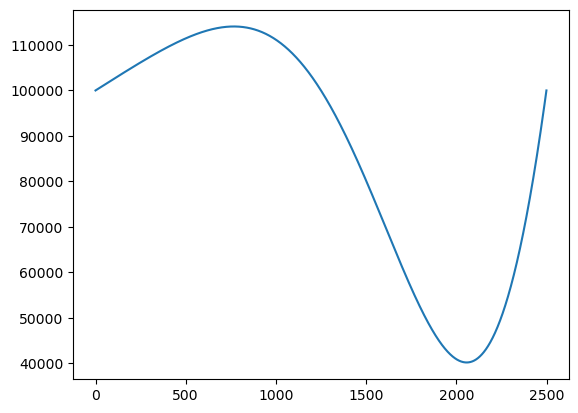

In [8]:
Q_11 = 100 * np.ones(shape = (num_grid_points,))
Q_22 = 100 * np.ones(shape = (num_grid_points,))
Q_12 = 100 * np.ones(shape = (num_grid_points,))
Resvoir = 1e2 * np.ones(shape  = (num_grid_points,))
Source  = 1e5 * np.ones(shape = (num_grid_points,)) + 1e4*np.array([np.sin(x)*np.cosh(x/2) for x in np.linspace(0,2*np.pi, num_grid_points)])
plt.plot(Source)

In [9]:
Temperatures_Solution = np.zeros((num_grid_points,))
Temperature_Grid = []
phi = np.zeros((num_grid_points,))
b = np.zeros((num_grid_points,))

In [10]:
Periodic_L_indices = np.zeros((num_grid_points, 2), dtype = np.int64)
index_a = 0
while index_a <= num_i_grid_points -1:
    index_b = 0
    while index_b <= num_j_grid_points -1:
        Periodic_L_indices[index_periodic_boundary_forward_converter(index_a,index_b, num_i_grid_points, num_j_grid_points)] = (int(index_a),int(index_b))
        index_b +=1
    index_a +=1
Periodic_L_indices.shape

(2500, 2)

In [ ]:
nbands_below = 3*num_i_grid_points - 1
nbands_above = nbands_below
def MatrixCreator(num_i_grid_points, num_j_grid_points, dt, \
                     di, dj, Q_11, Q_22, Q_12, Resvoir, ncols, nbands_above):
        
        def get_index(row, column, nbands_upper, n_columns):
            band_row = nbands_upper + row - column 
            if row < 0 or column < 0 or row >= n_columns or column >= n_columns:
                raise IndexError("Indexes out of bounds in get_index: {} {}".format(row, column))
            return band_row, column
    
        def set_value(band_matrix,row, column, value, nbands_upper):
        # Calculate the correct row in the band_matrix
            band_row = nbands_upper + row - column
            if band_row < 0 or band_row >= band_matrix.shape[0]:
                return IndexError("Indexes out of bounds in get_value: {} {}".format(row, column)) # Ignore values that are outside the band width
            return band_row, column, value

        def get_value(band_matrix, row, column, nbands_upper):
            band_row = nbands_upper + row - column
            if band_row < 0 or band_row >= band_matrix.shape[0]:
                raise IndexError("Indexes out of bounds in get_value: {} {}".format(row, column))
            return band_matrix[band_row, column]

        index_plus_i = 0
        index_minus_i = 0
        index_plus_j = 0
        index_minus_j = 0
        index_i = 0
        
        coefficient_matrix = np.zeros((ncols, ncols))
        nbrows = nbands_below + nbands_above + 1
        ncols = num_grid_points
        banded_coefficient_matrix = np.zeros((nbrows, ncols))
        while index_i < num_i_grid_points:

            if index_i ==0:
                

            if index_i == num_i_grid_points:
                index_plus_i = 0
            else:
                index_plus_i = index_i + 1
        
            index_j = 0
            while index_j < num_j_grid_points:
            
                if index_j ==0:
                    index_minus_j = num_j_grid_points - 1
                else:
                    index_minus_j = index_j -1

                if index_j == num_j_grid_points:
                    index_plus_j = 0
                else:
                    index_plus_j = index_j + 1

                index_current = index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)

                coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_plus_i, index_j, num_i_grid_points, num_j_grid_points)] = (-Q_11[index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)] * (dt))/(4*di**2)
                band_row, column, value = set_value(banded_coefficient_matrix, index_current, index_periodic_boundary_forward_converter(index_plus_i, index_j, num_i_grid_points, num_j_grid_points), coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_plus_i, index_j, num_i_grid_points, num_j_grid_points)], nbands_above)
                banded_coefficient_matrix[band_row, column] = value

                coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_i, index_plus_j, num_i_grid_points, num_j_grid_points)] = (-Q_22[index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)] * (dt))/(4*dj**2)
                band_row, column, value = set_value(banded_coefficient_matrix, index_current, index_periodic_boundary_forward_converter(index_i, index_plus_j, num_i_grid_points, num_j_grid_points), coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_i, index_plus_j, num_i_grid_points, num_j_grid_points)], nbands_above)
                banded_coefficient_matrix[band_row, column] = value

                coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)] = (Q_11[index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)] *(dt)/(2*di**2) + Q_22[index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)] * (dt)/(2*dj**2) + Resvoir[index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)]*(dt/2) + 1)
                band_row, column, value = set_value(banded_coefficient_matrix, index_current, index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points), coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)], nbands_above)
                banded_coefficient_matrix[band_row, column] = value

                coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_minus_i, index_j, num_i_grid_points, num_j_grid_points)] = (-Q_11[index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)] * (dt))/(4*di**2)
                band_row, column, value = set_value(banded_coefficient_matrix, index_current, index_periodic_boundary_forward_converter(index_minus_i, index_j, num_i_grid_points, num_j_grid_points), coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_minus_i, index_j, num_i_grid_points, num_j_grid_points)], nbands_above)
                banded_coefficient_matrix[band_row, column] = value

                coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_i, index_minus_j, num_i_grid_points, num_j_grid_points)] = (-Q_22[index_periodic_boundary_forward_converter(index_i, index_j, num_i_grid_points, num_j_grid_points)] * (dt))/(4*dj**2)
                band_row, column, value = set_value(banded_coefficient_matrix, index_current, index_periodic_boundary_forward_converter(index_i, index_minus_j, num_i_grid_points, num_j_grid_points), coefficient_matrix[index_current, index_periodic_boundary_forward_converter(index_i, index_minus_j, num_i_grid_points, num_j_grid_points)], nbands_above)
                banded_coefficient_matrix[band_row, column] = value

                index_j +=1
            index_i +=1

        return coefficient_matrix, banded_coefficient_matrix